In [27]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
df = pd.read_csv("netflix_titles.csv", sep=",", encoding="ISO-8859-1", header=0)

In [29]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 395.5+ KB


In [31]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [32]:
df.director.fillna("No Director", inplace=True)
df.director.fillna("No Cast", inplace=True)
df.director.fillna("Country Unavaliable", inplace=True)

In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [35]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [36]:
print((df.type.value_counts()/ len(df)) * 100)

Movie      71.669426
TV Show    28.330574
Name: type, dtype: float64


In [37]:
Movie = df[df['type']=='Movie']
TV_Show = df[df['type']=='TV Show']

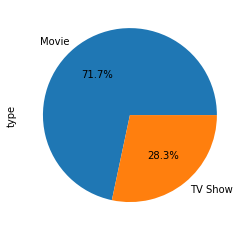

In [38]:
((df.type.value_counts()/ len(df)) * 100).plot.pie( autopct='%1.1f%%',) 
# Show the plot
plt.show()

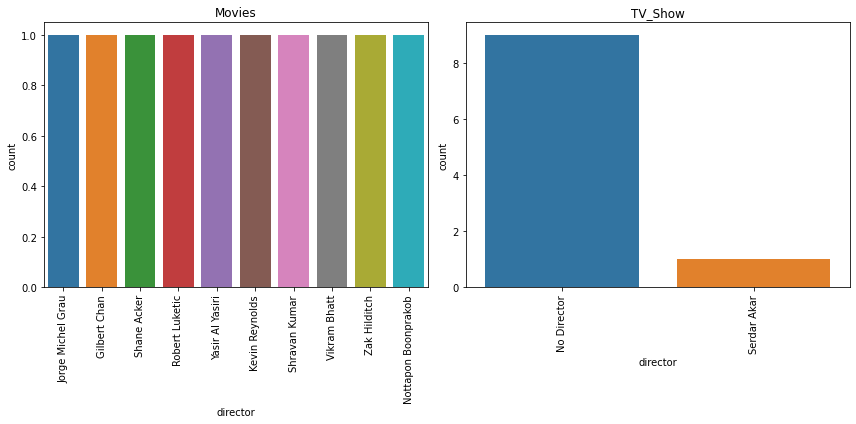

In [39]:
f, axes = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(hspace=0.6, wspace=0.9)
chart = sns.countplot('director', data=Movie.head(10) , ax=axes[0])
chart1 = sns.countplot('director', data=TV_Show.head(10), ax=axes[1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart.set_title('Movies')
chart1.set_title('TV_Show')
plt.tight_layout()

plt.show()

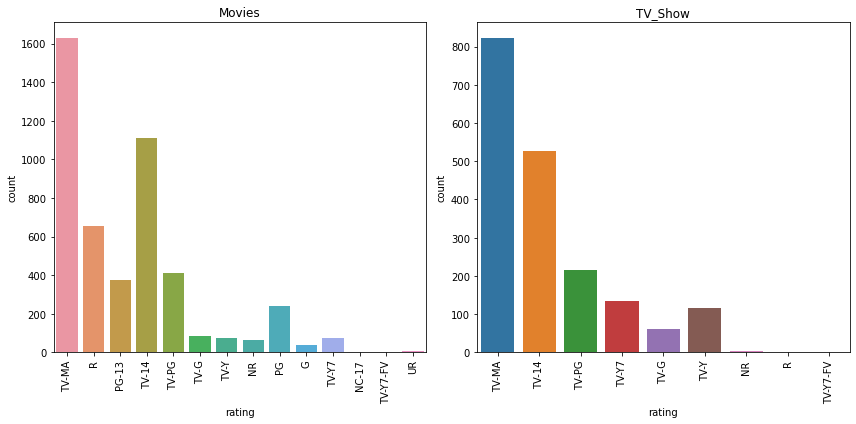

In [40]:
f, axes = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(hspace=0.6, wspace=0.9)
chart = sns.countplot('rating', data=Movie , ax=axes[0])
chart1 = sns.countplot('rating', data=TV_Show, ax=axes[1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart.set_title('Movies')
chart1.set_title('TV_Show')
plt.tight_layout()

plt.show()

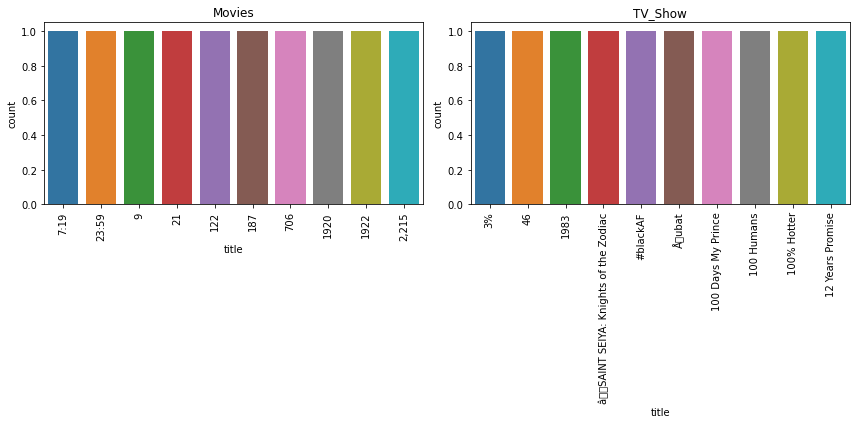

In [46]:
f, axes = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(hspace=0.6, wspace=0.9)
chart = sns.countplot('title', data=Movie.head(10) , ax=axes[0])
chart1 = sns.countplot('title', data=TV_Show.head(10), ax=axes[1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart.set_title('Movies')
chart1.set_title('TV_Show')
plt.tight_layout()

plt.show()

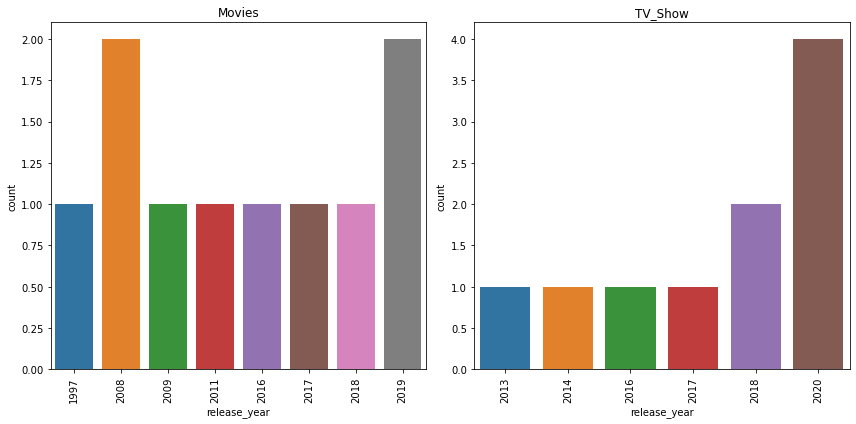

In [42]:
f, axes = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(hspace=0.6, wspace=0.9)
chart = sns.countplot('release_year', data=Movie.head(10) , ax=axes[0])
chart1 = sns.countplot('release_year', data=TV_Show.head(10), ax=axes[1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart.set_title('Movies')
chart1.set_title('TV_Show')
plt.tight_layout()

plt.show()

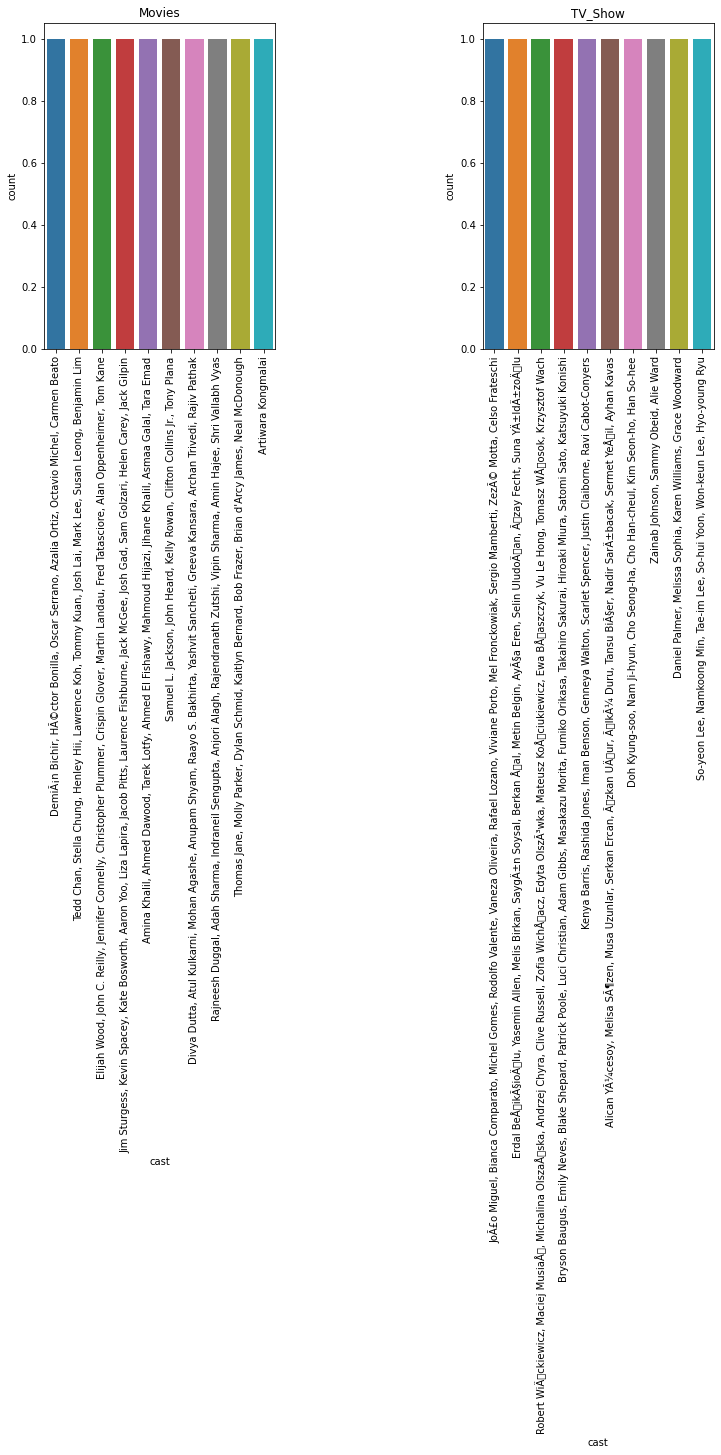

In [49]:
f, axes = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(hspace=0.6, wspace=0.9)
chart = sns.countplot('cast', data=Movie.head(10) , ax=axes[0])
chart1 = sns.countplot('cast', data=TV_Show.head(10), ax=axes[1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart.set_title('Movies')
chart1.set_title('TV_Show')
plt.tight_layout()

plt.show()

In [43]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
